# CSS Trends: Final Project

# Reading Data
Below I have loaded the data into python. I removed columns that I will not be using for analysis. I also deleted rows with missing values in my target variable College GPA. 

In [1]:
#reading data file
import pyreadstat
css, meta = pyreadstat.read_sav('/Users/bryanatividad/Desktop/DATA1030-Fall2022/CSS_TRENDS.sav', apply_value_formats=True)
type(css)
type(meta)

pyreadstat._readstat_parser.metadata_container

In [2]:
#viewing the labels of 163 columns
display(meta.column_names_to_labels)
display(css.isnull().any())
print(css['COMPGROUP3'].value_counts())

{'YEAR': 'CSS Year',
 'ACERECODE': 'Recoded College I.D.',
 'SUBJID': 'Subject I.D.',
 'INSTTYPE': 'Institutional Type',
 'INSTCONT': 'INSTITUTIONAL CONTROL',
 'HBCU': 'Historically Black College or University',
 'HBCU2': 'Historically Black College or University 2',
 'STRAT': 'CIRP Stratification Cell',
 'COMPGROUP1': 'Comparison Group 1',
 'COMPGROUP2': 'Comparison Group 2',
 'COMPGROUP3': 'Comparison Group 3',
 'OBEREG': 'OBE region code',
 'HERIREG': 'HERI Region',
 'INSTSEX': "Institution's sex",
 'NORMSTAT': 'CSS Graduating Senior Status',
 'SEX': 'Your sex:',
 'GENDERIDENTITY': 'What is your current gender identity?',
 'RACE1': 'White/Caucasian',
 'RACE2': 'African American/Black',
 'RACE3': 'American Indian/Alaska Native',
 'RACE4': 'Asian',
 'RACE5': 'Native Hawaiian/Pacific Islander',
 'RACE6': 'Mexican American/Chicana/o/x',
 'RACE7': 'Puerto Rican',
 'RACE8': 'Other Latina/o/x',
 'RACE9': 'Other',
 'RACE10': 'East Asian (e.g., Chinese, Japanese, Korean, Taiwanese)',
 'RACE1

YEAR            False
ACERECODE       False
SUBJID          False
INSTTYPE        False
INSTCONT        False
                ...  
MOTHEDUC_TFS     True
SCAREER_TFS      True
SCAREERA_TFS     True
VETERAN          True
VETERAN_TFS      True
Length: 163, dtype: bool

All Baccalaureate Institutions    111310
All 2yr Colleges                      19
Name: COMPGROUP3, dtype: int64


In [3]:
#eliminating columns I will not use for analysis
css2 = css[['YEAR','INSTTYPE','HBCU','SEX',\
            'COLLGPA','HABITS_OF_MIND',\
            'DISAB5_TFS', 'DISAB01_TFS', 'DISAB02_TFS','DISAB06_TFS',\
            'FAC_INTERACTION','SATIS_COURSES','SATIS_OVERALL',\
            'SENSE_BELONG']]
#viewing data types of columns
display(css2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111329 entries, 0 to 111328
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   YEAR             111329 non-null  float64 
 1   INSTTYPE         111329 non-null  category
 2   HBCU             111329 non-null  category
 3   SEX              108486 non-null  category
 4   COLLGPA          99829 non-null   category
 5   HABITS_OF_MIND   93614 non-null   float64 
 6   DISAB5_TFS       20552 non-null   category
 7   DISAB01_TFS      12731 non-null   category
 8   DISAB02_TFS      12755 non-null   category
 9   DISAB06_TFS      12705 non-null   category
 10  FAC_INTERACTION  101058 non-null  float64 
 11  SATIS_COURSES    102984 non-null  float64 
 12  SATIS_OVERALL    104186 non-null  float64 
 13  SENSE_BELONG     102607 non-null  float64 
dtypes: category(8), float64(6)
memory usage: 5.9 MB


None

In [4]:
#viewing which columns have missing data and the percent of missing values
#by columns
import pandas as pd 
perc_missing = css2.isnull().sum()*100/len(css2.index)
miss_v = pd.DataFrame({'Percent_Missing': perc_missing})
miss_v.sort_values('Percent_Missing', ascending=False, inplace=True)
display(miss_v)

,Percent_Missing
DISAB06_TFS,88.587879
DISAB01_TFS,88.564525
DISAB02_TFS,88.542967
DISAB5_TFS,81.539401
HABITS_OF_MIND,15.912296
COLLGPA,10.329743
FAC_INTERACTION,9.225808
SENSE_BELONG,7.834437
SATIS_COURSES,7.495801
SATIS_OVERALL,6.416118


In [5]:
#deleting missing values for target variable College GPA
css3 = css2.dropna(how='any',subset=['COLLGPA'])
print("Number of rows before deleting missing values: ", len(css2),\
      "\n""","Number of rows after deleting missing values: ",len(css3))

Number of rows before deleting missing values:  111329 
 Number of rows after deleting missing values:  99829


# Exploratory Data Analysis

In [6]:
#viewing value counts for each variable in dataset
for col in css3.columns:
    if css3[col].dtypes == 'float64':
        count = css3[col].describe().to_frame()
    else:
        count = css3[col].value_counts(normalize=True).to_frame().sort_index()    
    display(count)

,YEAR
count,99829.000000
mean,2012.647397
std,2.829016
min,2009.000000
25%,2010.000000
50%,2012.000000
75%,2014.000000
max,2018.000000


,INSTTYPE
2YR COLLEGE,0.000180
4YR COLLEGE,0.696100
UNIVERSITY,0.303719


,HBCU
NO,0.996544
YES,0.003456


,SEX
Female,0.632511
"Genderqueer, gender non-conforming, other identity",0.000875
Male,0.366614


,COLLGPA
A or A+,0.195825
A-,0.273277
B,0.173557
B+,0.245720
B-,0.068036
C,0.009907
C+,0.033177
D,0.000501


,HABITS_OF_MIND
count,85733.000000
mean,53.040562
std,11.113435
min,4.010000
25%,45.630000
50%,52.620000
75%,60.110000
max,79.080000


,DISAB5_TFS
Marked,0.034714
Not marked,0.965286


,DISAB01_TFS
No,0.964408
Yes,0.035592


,DISAB02_TFS
No,0.952566
Yes,0.047434


,DISAB06_TFS
No,0.938768
Yes,0.061232


,FAC_INTERACTION
count,98394.000000
mean,52.431038
std,9.184342
min,26.650000
25%,46.530000
50%,51.460000
75%,58.470000
max,74.630000


,SATIS_COURSES
count,99549.000000
mean,51.026921
std,9.092302
min,18.980000
25%,44.510000
50%,49.880000
75%,58.100000
max,67.500000


,SATIS_OVERALL
count,99735.000000
mean,52.120691
std,7.953454
min,22.270000
25%,47.780000
50%,51.250000
75%,57.590000
max,67.050000


,SENSE_BELONG
count,99073.000000
mean,50.983534
std,8.948619
min,24.440000
25%,47.610000
50%,48.980000
75%,58.960000
max,65.480000


A-         27281
B+         24530
A or A+    19549
B          17326
B-          6792
C+          3312
C            989
D             50
Name: COLLGPA, dtype: int64

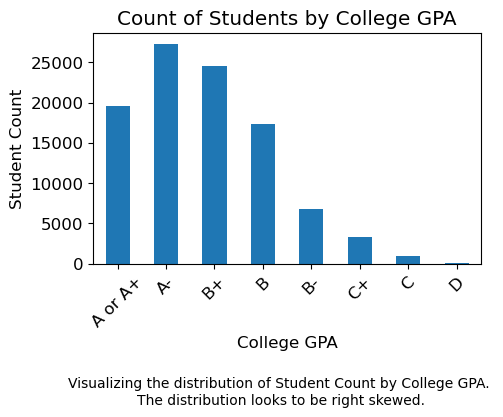

In [7]:
import matplotlib
from matplotlib import pylab as plt
#The ML target variable in this dataset is College GPA, which is categorical
display(css3['COLLGPA'].value_counts())
#visualizing the target variable College GPA by Student Count
GPA_order = ['A or A+','A-','B+','B','B-','C+','C','D']

plt.rcParams['font.size']='12'
plt.figure(figsize=(5,3))
pd.value_counts(css3['COLLGPA']).reindex(GPA_order).plot.bar(rot=45)
plt.suptitle(None)
plt.title('Count of Students by College GPA')
plt.ylabel('Student Count')
plt.xlabel('College GPA')
txt = """Visualizing the distribution of Student Count by College GPA. 
The distribution looks to be right skewed."""
plt.figtext(0.5, -.35, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.savefig('coll_gpa.png',dpi=300,bbox_inches='tight')

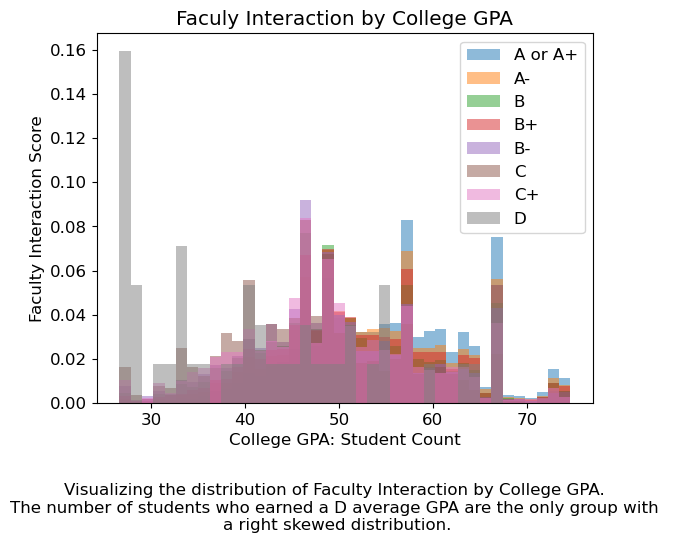

In [8]:
#visualizing faculty interaction by GPA
import matplotlib
from matplotlib import pylab as plt

categories = css3['COLLGPA'].unique().sort_values()
bin_range = (css3['FAC_INTERACTION'].min(),css3['FAC_INTERACTION'].max())

plt.rcParams['font.size']='12'

for c in categories:
    plt.hist(css3[css3['COLLGPA']==c]['FAC_INTERACTION'],alpha=0.5,\
             label=c,range=bin_range,bins=40,density=True)
plt.legend()
plt.ylabel('Faculty Interaction Score')
plt.xlabel('College GPA: Student Count')
plt.title('Faculy Interaction by College GPA')
txt = """Visualizing the distribution of Faculty Interaction by College GPA. 
The number of students who earned a D average GPA are the only group with 
a right skewed distribution."""
plt.figtext(0.5, -.15, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=12)
plt.savefig('cat_spec_hist.png',dpi=300,bbox_inches='tight')

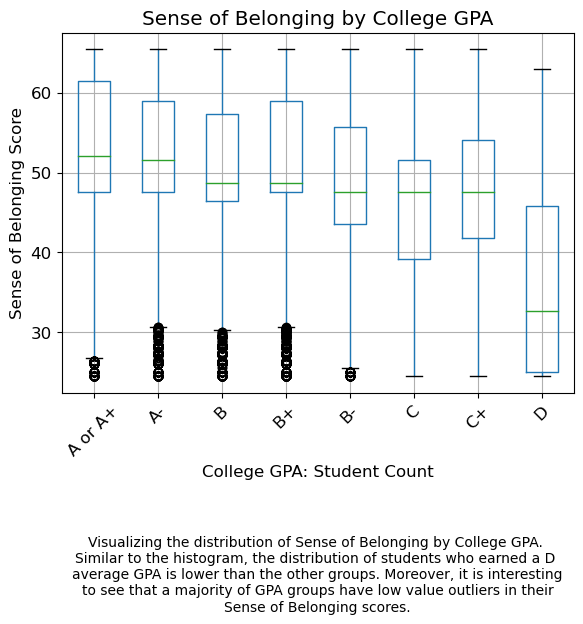

In [9]:
#visualizing Overall Satisfaction by College GPA
css3[['SENSE_BELONG','COLLGPA']].boxplot(by='COLLGPA',rot=45,\
                                         fontsize=12)

plt.rcParams['font.size']='12'
plt.suptitle(None)
plt.title('Sense of Belonging by College GPA')
plt.ylabel('Sense of Belonging Score')
plt.xlabel('College GPA: Student Count')
txt = """Visualizing the distribution of Sense of Belonging by College GPA. 
Similar to the histogram, the distribution of students who earned a D 
average GPA is lower than the other groups. Moreover, it is interesting
to see that a majority of GPA groups have low value outliers in their
Sense of Belonging scores."""
plt.figtext(0.5, -.30, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.savefig('sense_box.png',dpi=300,bbox_inches='tight')

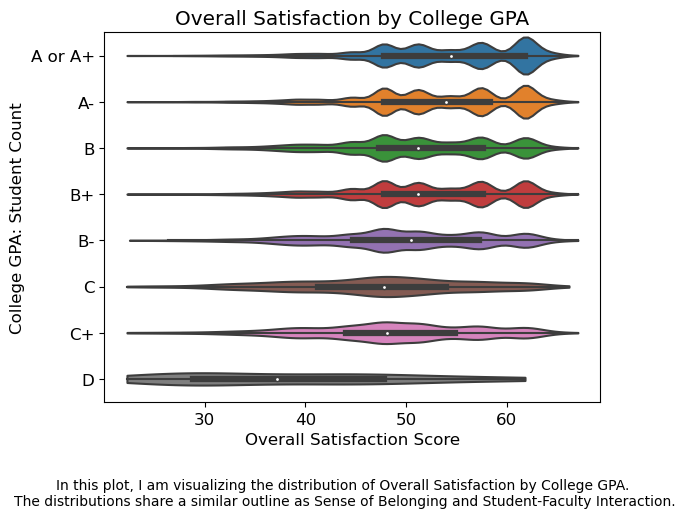

In [10]:
import seaborn as sns
sns.violinplot(data=css3,x='SATIS_OVERALL',y='COLLGPA',\
               cut=0)

plt.rcParams['font.size']='12'
plt.suptitle(None)
plt.title('Overall Satisfaction by College GPA')
plt.xlabel('Overall Satisfaction Score')
plt.ylabel('College GPA: Student Count')
txt = """In this plot, I am visualizing the distribution of Overall Satisfaction by College GPA. 
The distributions share a similar outline as Sense of Belonging and Student-Faculty Interaction."""
plt.figtext(0.5, -.10, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.savefig('viol_sat.png',dpi=300,bbox_inches='tight')

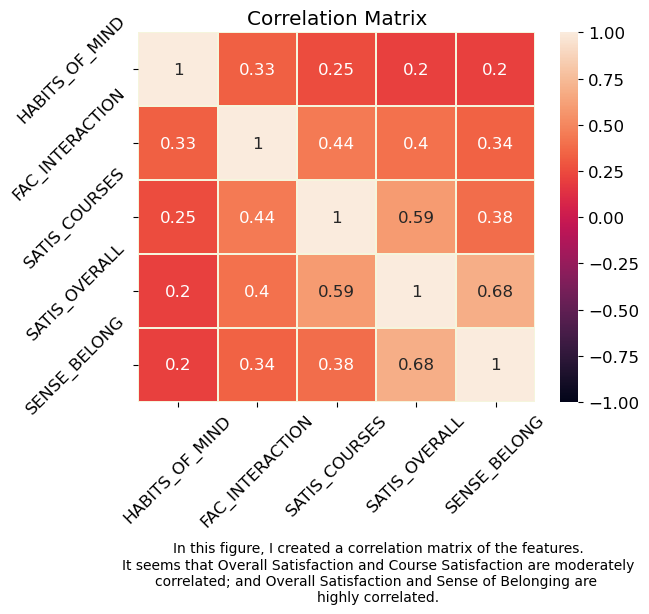

In [11]:
#calculating correlation matrix
css4 = css3.drop('YEAR',axis=1)
css_pear = css4.corr(method='pearson',min_periods=1)
sns.heatmap(css_pear, annot=True, vmin=-1, vmax=1,\
           linewidths=0.1,linecolor='beige')


plt.rcParams['font.size']='12'
plt.suptitle(None)
plt.title('Correlation Matrix')
txt = """In this figure, I created a correlation matrix of the features.
It seems that Overall Satisfaction and Course Satisfaction are moderately
correlated; and Overall Satisfaction and Sense of Belonging are 
highly correlated."""
plt.figtext(0.5, -.3, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.savefig('corr_matr.png',dpi=300,bbox_inches='tight')

# Data Preprocessing

In [12]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#dropping all missing values and 
#disability categories given their large missing percentages
css6 = css2.dropna(how='any',subset=['COLLGPA'])
df_css = pd.DataFrame(css6)
df_css = df_css.drop(['INSTTYPE','HBCU','SEX',\
                      'DISAB5_TFS','DISAB01_TFS','DISAB02_TFS','DISAB06_TFS'],axis=1)
df_css = df_css.dropna()

In [13]:
#converting the categories of college GPA into numeric values
df_css['COLLGPA'] = df_css['COLLGPA'].replace({'A or A+':4, 'A-':3.7,\
                                               'B':3, 'B+':3.3, 'B-':2.7,\
                                               'C':2, 'C+':2.3, 'D':1})
df_css['COLLGPA']=pd.to_numeric(df_css['COLLGPA'])

In [14]:
import math
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import make_scorer, mean_squared_error

#unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer)
#an initialized ML algorithm and corresponding parameter grid as inputs    
def MLpipe_KFold_RMSE(X, y, ML_algo, param_grid): 
    test_scores = []
    best_models = []
    best_params = []
    
    #split data to train, test, val (60-20-20)
    for i in range(1,10):
        random_state = i
        X_train, X_other, y_train, y_other = train_test_split(X,y,\
                        train_size=0.6,random_state = i)
        X_val, X_test, y_val, y_test = train_test_split(X_other, y_other,\
                        test_size=0.5, random_state=i)
    #kfold with 4 folds
        kf = KFold(n_splits=4,shuffle=True,random_state=i)
    #GridSearchCV    
        minmax_ftrs = ['HABITS_OF_MIND','FAC_INTERACTION','SATIS_COURSES',\
               'SATIS_OVERALL','SENSE_BELONG']
        
        preprocessor = ColumnTransformer(
            transformers = [('minmax', MinMaxScaler(), minmax_ftrs)])
        
        pipe = Pipeline(steps=[('preprocessor',preprocessor),('model',ML_algo)])
        
        grid = GridSearchCV(pipe, param_grid=param_grid,\
                            cv=kf, return_train_score = True)
        grid.fit(X_train, y_train)
        
        best_estim = grid.best_estimator_
        best_estim.fit(X_train, y_train)
        
        y_pred = best_estim.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        print("mse: ",mse)
        rmse = np.sqrt(mse)
        print("rmse: ",rmse)
        
        test_scores.append(rmse)
        best_models.append(grid.best_estimator_)
        best_params.append(grid.best_params_)
        #multiply by negative: test scores
        
    #Models & Tests
        
    return best_models, test_scores, best_params[0]

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np
#baseline model accuracy
y_m = df_css['COLLGPA'].mean()
y_mean = [y_m]*84406
y = df_css['COLLGPA']
print("Baseline RMSE: ",np.sqrt(mean_squared_error(y,y_mean)))

Baseline RMSE:  0.46917531012517943


In [16]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from statistics import mean, stdev

y = df_css['COLLGPA']
X = df_css.loc[:, df_css.columns != 'COLLGPA']

ML_algo = LinearRegression()

param_grid = {}

linregmodel = MLpipe_KFold_RMSE(X, y, ML_algo, param_grid)

print('Linear Regression: ')
print('Mean: ', mean(linregmodel[1]))
print('Standard Deviation: ', stdev(linregmodel[1]))
print("Parameters: ", linregmodel[2])

mse:  0.21289543377911893
rmse:  0.4614059316687627
mse:  0.203395932829499
rmse:  0.45099438225935695
mse:  0.2041784094407663
rmse:  0.4518610510331315
mse:  0.20590763392714842
rmse:  0.4537704639210759
mse:  0.21022596694987744
rmse:  0.45850405336253836
mse:  0.20676096184628978
rmse:  0.4547097556093225
mse:  0.20475024530248367
rmse:  0.4524933649264746
mse:  0.2112603751109476
rmse:  0.4596306942654588
mse:  0.20799377906909855
rmse:  0.4560633498419913
Linear Regression: 
Mean:  0.45549256076534583
Standard Deviation:  0.0036654133818583307
Parameters:  {}


In [17]:
from sklearn.pipeline import Pipeline

y = df_css['COLLGPA']
X = df_css.loc[:, df_css.columns != 'COLLGPA']

ML_algo = Lasso()

param_grid = {'model__alpha': list(np.logspace(1, 5, 15)), 'model__max_iter': [100000000]}

lassomodel = MLpipe_KFold_RMSE(X, y, ML_algo, param_grid)

print('L1: ')
print('Mean: ', mean(lassomodel[1]))
print('Standard Deviation: ', stdev(lassomodel[1]))
print("Parameters: ", lassomodel[2])

mse:  0.22571423890934578
rmse:  0.47509392640755344
mse:  0.21672516189124
rmse:  0.46553749783582415
mse:  0.2163807095648397
rmse:  0.4651673995077898
mse:  0.22082043918845629
rmse:  0.4699153532163599
mse:  0.223636065445779
rmse:  0.4729017503094898
mse:  0.22097156435646798
rmse:  0.4700761261290218
mse:  0.21963200282344952
rmse:  0.4686491254909685
mse:  0.22495821674318542
rmse:  0.4742976035604496
mse:  0.22158231178273174
rmse:  0.4707253039541551
L1: 
Mean:  0.47026267626795687
Standard Deviation:  0.003497293403197723
Parameters:  {'model__alpha': 10.0, 'model__max_iter': 100000000}


In [18]:
##L2 Regularization##
from sklearn.linear_model import Ridge
ML_algo = Ridge()

param_grid = {'model__alpha': list(np.logspace(-1,0,25)), 'model__max_iter': [10000000]}

ridgemodel = MLpipe_KFold_RMSE(X, y, ML_algo, param_grid)

print('L2: ')
print('Mean: ', mean(ridgemodel[1]))
print('Standard Deviation: ', stdev(ridgemodel[1]))
print("Parameters: ", ridgemodel[2])

mse:  0.2128948694632504
rmse:  0.46140532015057045
mse:  0.20339461388955407
rmse:  0.45099291999936547
mse:  0.20417768107881315
rmse:  0.4518602450745287
mse:  0.20590785750468227
rmse:  0.453770710276327
mse:  0.21022672219927538
rmse:  0.4585048769634576
mse:  0.2067605976039528
rmse:  0.45470935508734894
mse:  0.2047515335269076
rmse:  0.4524947883975103
mse:  0.21126071731883728
rmse:  0.4596310665292733
mse:  0.20799320721027
rmse:  0.4560627228904704
L2: 
Mean:  0.4554924450409836
Standard Deviation:  0.0036655898369497577
Parameters:  {'model__alpha': 1.0, 'model__max_iter': 10000000}


In [19]:
##RF##
from sklearn.ensemble import RandomForestRegressor
ML_algo = RandomForestRegressor()

param_grid = {'model__n_estimators': [1, 3, 10, 30],
              'model__max_depth': [1, 2, 3, 10, 30]}

RF = MLpipe_KFold_RMSE(X, y, ML_algo, param_grid)


print('RF: ')
print('Mean: ', mean(RF[1]))
print('Standard Deviation: ', stdev(RF[1]))
print("Parameters: ", RF[2])

mse:  0.2131408329999837
rmse:  0.4616717805974107
mse:  0.2037525582961318
rmse:  0.45138958594115997
mse:  0.20397358943638985
rmse:  0.4516343536937706
mse:  0.20603134739697007
rmse:  0.45390676068656444
mse:  0.21118313837827196
rmse:  0.4595466661594576
mse:  0.20664991738643176
rmse:  0.4545876344407443
mse:  0.2055315665768848
rmse:  0.4533558939474426
mse:  0.21126119173762312
rmse:  0.45963158261549336
mse:  0.20821262736628557
rmse:  0.45630321866746193
RF: 
Mean:  0.4557808307499451
Standard Deviation:  0.003729585482701622
Parameters:  {'model__max_depth': 3, 'model__n_estimators': 30}


In [20]:
import warnings
def MLpipe_KFold_RMSE_RCV(X, y, ML_algo, param_grid): 
    test_scores = []
    best_models = []
    best_params = []
    
    #split data to train, test, val (60-20-20)
    for i in range(1,10):
        random_state = i
        X_train, X_other, y_train, y_other = train_test_split(X,y,\
                        train_size=0.6,random_state = i)
        X_val, X_test, y_val, y_test = train_test_split(X_other, y_other,\
                        test_size=0.5, random_state=i)
    #kfold with 4 folds
        kf = KFold(n_splits=4,shuffle=True,random_state=i)
    #GridSearchCV    
        #ignoring warnings
        warnings.filterwarnings("ignore")
        minmax_ftrs = ['HABITS_OF_MIND','FAC_INTERACTION','SATIS_COURSES',\
               'SATIS_OVERALL','SENSE_BELONG']
        
        preprocessor = ColumnTransformer(
            transformers = [('minmax', MinMaxScaler(), minmax_ftrs)])
        
        pipe = Pipeline(steps=[('preprocessor',preprocessor),('model',ML_algo)])
        
        grid = RandomizedSearchCV(estimator = ML_algo,param_distributions = param_grid,
               n_iter = 100, cv = 5, random_state=i, n_jobs = -1)
        grid.fit(X_train, y_train)
        
        best_estim = grid.best_estimator_
        best_estim.fit(X_train, y_train)
        
        y_pred = best_estim.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        print("mse: ",mse)
        rmse = np.sqrt(mse)
        print("rmse: ",rmse)
        
        test_scores.append(rmse)
        best_models.append(grid.best_estimator_)
        best_params.append(grid.best_params_)
        #multiply by negative: test scores
        
    #Models & Tests
        
    return best_models, test_scores, best_params[0]

In [21]:
from sklearn.model_selection import RandomizedSearchCV

ML_algo = RandomForestRegressor()
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['sqrt','sqrd'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,\
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,\
               'bootstrap': bootstrap}
    
rfr = MLpipe_KFold_RMSE_RCV(X, y, ML_algo, param_grid)

print('RF: ')
print('Mean: ', mean(rfr[1]))
print('Standard Deviation: ', stdev(rfr[1]))
print("Parameters: ", rfr[2])

mse:  0.211614732694342
rmse:  0.4600160135194665
mse:  0.20177047234346124
rmse:  0.44918868234124204
mse:  0.20251323928681614
rmse:  0.4500147100782553
mse:  0.20443251559447365
rmse:  0.4521421409186205
mse:  0.20946910066989566
rmse:  0.4576779442685606
mse:  0.20563757091841198
rmse:  0.45347278961191484
mse:  0.20447668504493274
rmse:  0.45219098293191645
mse:  0.20989593866660294
rmse:  0.4581440152033015
mse:  0.2070438334921961
rmse:  0.4550206956745991
RF: 
Mean:  0.4542075527275419
Standard Deviation:  0.0037679589708490336
Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [22]:
print(linregmodel[1])

[0.4614059316687627, 0.45099438225935695, 0.4518610510331315, 0.4537704639210759, 0.45850405336253836, 0.4547097556093225, 0.4524933649264746, 0.4596306942654588, 0.4560633498419913]


In [23]:
#standard deviations above baseline
#baseline
y_m = df_css['COLLGPA'].mean()
y_mean = [y_m]*84406
y = df_css['COLLGPA']

#calculations of each model
def baseline_calc(mean,stdev):
    std_away = (mean-(np.sqrt(mean_squared_error(y,y_mean))))/stdev
    return std_away
print("Linear Regression model is ",\
      baseline_calc(mean(linregmodel[1]),stdev(linregmodel[1])),\
      "standard deviations away from the baseline.\n")

print("Linear Regression model with Lasso regularization is ",\
      baseline_calc(mean(lassomodel[1]),stdev(lassomodel[1])),\
      "standard deviations away from the baseline.\n")

print("Linear Regression model with Ridge regularization is ",\
      baseline_calc(mean(ridgemodel[1]),stdev(ridgemodel[1])),\
      "standard deviations away from the baseline.\n")

print("Random Forest model with RSCV is ",\
      baseline_calc(mean(rfr[1]),stdev(rfr[1])),\
      "standard deviations away from the baseline.\n")

Linear Regression model is  -3.7329348519201875 standard deviations away from the baseline.

Linear Regression model with Lasso regularization is  0.3109164766625558 standard deviations away from the baseline.

Linear Regression model with Ridge regularization is  -3.7327867254187295 standard deviations away from the baseline.

Random Forest model with RSCV is  -3.972378020418008 standard deviations away from the baseline.



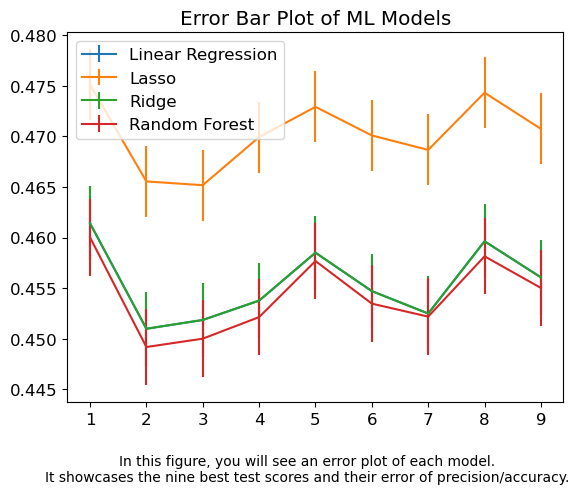

In [24]:
#creating error bar
data = [[1,'baseline',0.469],[2,'Linear Regression',mean(linregmodel[1]),stdev(linregmodel[1])],\
        [3,'Lasso',mean(lassomodel[1]),stdev(lassomodel[1])],\
       [4,'Ridge',mean(ridgemodel[1]),stdev(ridgemodel[1])],\
       [5,'RF Regressor',mean(rfr[1]),stdev(rfr[1])]]
df_error = pd.DataFrame(data,columns=['Position','Model','Mean','StDev'])

plt.errorbar(list(range(1,10)),linregmodel[1],yerr=stdev(linregmodel[1]),label='Linear Regression')
plt.errorbar(list(range(1,10)),lassomodel[1],yerr=stdev(lassomodel[1]),label='Lasso')
plt.errorbar(list(range(1,10)),ridgemodel[1],yerr=stdev(ridgemodel[1]),label='Ridge')
plt.errorbar(list(range(1,10)),rfr[1],yerr=stdev(rfr[1]),label='Random Forest')
plt.title("Error Bar Plot of ML Models")
txt = """In this figure, you will see an error plot of each model.
It showcases the nine best test scores and their error of precision/accuracy."""
plt.figtext(0.5, -.05, txt, wrap=True,\
           horizontalalignment='center',
           fontsize=10)
plt.legend()
plt.savefig('error_bar.png',dpi=300,bbox_inches='tight')

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

y = df_css['COLLGPA']
X = df_css.loc[:, df_css.columns != 'COLLGPA']
ftrs = df_css.columns

X_train, X_other, y_train, y_other = train_test_split(X,y,\
                train_size=0.6,random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other,\
                test_size=0.5, random_state=42)

minmax_ftrs = ['HABITS_OF_MIND','FAC_INTERACTION','SATIS_COURSES',\
               'SATIS_OVERALL','SENSE_BELONG']
        
preprocessor = ColumnTransformer(
            transformers = [('minmax', MinMaxScaler(), minmax_ftrs)])

# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_val)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)

# train the XGBoost model
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#ignoring warnings
warnings.filterwarnings("ignore")

param_grid = {'n_estimators': [20],\
               'min_samples_split': [6],\
               'min_samples_leaf': [4],\
               'max_features': ['sqrt'],\
               'max_depth': [10],\
               'bootstrap': [True]}

RF = RandomForestRegressor()
RF.set_params(**ParameterGrid(param_grid)[0])
RF.fit(df_train,y_train)
y_CV_pred = RF.predict(df_CV)
print('the CV RMSE:',np.sqrt(mean_squared_error(y_val,y_CV_pred)))
y_test_pred = RF.predict(df_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('the test R2:',r2_score(y_test,y_test_pred))

from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

#calculating permutation importance values on test set
r = permutation_importance(RF, df_test, y_test,
                           n_repeats=30,
                           random_state=0)

#finding top 10 most important values
sorted_imp = r.importances_mean.argsort()[::-1][:10]

for i in r.importances_mean.argsort()[::-1][:10]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:    
        print(f"{feature_names[i]:<8}"," "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")


(50643, 5)
(16881, 5)
(16882, 5)
the CV RMSE: 0.45609300051508656
the test RMSE: 0.454921114455863
the test R2: 0.06024845274305701
minmax__HABITS_OF_MIND  0.032 +/- 0.002
minmax__SATIS_OVERALL  0.029 +/- 0.002
minmax__FAC_INTERACTION  0.028 +/- 0.002
minmax__SENSE_BELONG  0.007 +/- 0.001
minmax__SATIS_COURSES  0.004 +/- 0.001


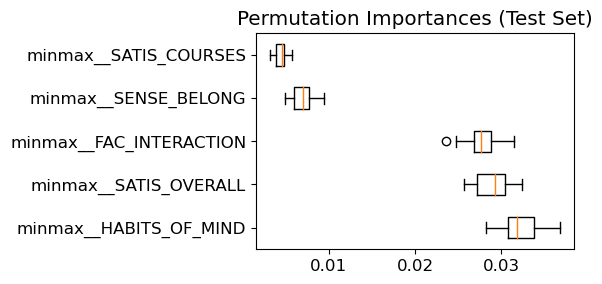

In [26]:
#visualizing top 10 most important features
fig, ax = plt.subplots(figsize=(6, 3))
ax.boxplot(r.importances[sorted_imp].T,
           vert=False, labels=feature_names[sorted_imp])
ax.set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.savefig('perm_feat.png',dpi=300,bbox_inches='tight')

In [27]:
def RF_importance(xlabel):
    RF1 = RandomForestRegressor()
    RF1.set_params(**ParameterGrid(param_grid)[0])
    RF1.fit(df_train,y_train)
    y_CV_pred = RF1.predict(df_CV)
    y_test_pred = RF1.predict(df_test)
    f_i = RF1.feature_importances_.argsort()[::-1][:10]
    for i in f_i:
        print(f"{feature_names[i]:<8}"," "
              f"{RF1.feature_importances_[i]:.3f}")
    #visualizing top 10 most important features
    plt.barh(feature_names[f_i],RF1.feature_importances_[f_i])
    plt.xlabel(xlabel)
    fig.tight_layout()
    plt.savefig('rf_feat.png',dpi=300,bbox_inches='tight')

minmax__HABITS_OF_MIND  0.288
minmax__FAC_INTERACTION  0.284
minmax__SATIS_OVERALL  0.191
minmax__SATIS_COURSES  0.128
minmax__SENSE_BELONG  0.109


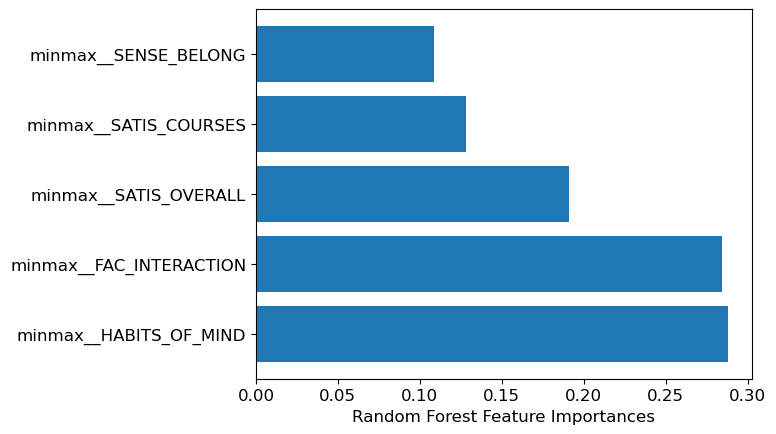

In [28]:
RF_importance("Random Forest Feature Importances")

In [29]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
model = RF.fit(df_train,y_train)
explainer = shap.TreeExplainer(model)
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(df_test[:1000])

print(np.shape(shap_values))

(1000, 5)


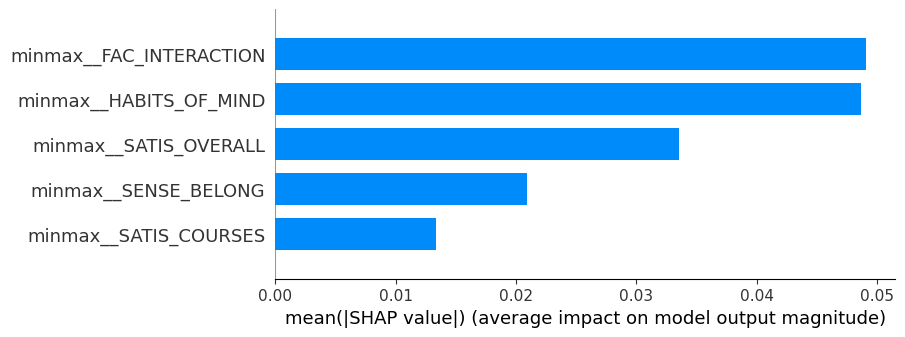

In [30]:
#plotting top 10 most important features
shap.summary_plot(shap_values,df_test,plot_type="bar",max_display=10,show=False)
plt.savefig('shap_plot.png',dpi=300,bbox_inches='tight')

In [31]:
#visualizing forceplot
def gpa_function(index,label,fig_name):
    print(label)
    plot = shap.force_plot(
            explainer.expected_value,
            shap_values[index,:],
            df_test.iloc[index,:],
            show=False,
            matplotlib=True)
    plot.savefig(fig_name,dpi=300)
    return plot

Force Plot at Index 0


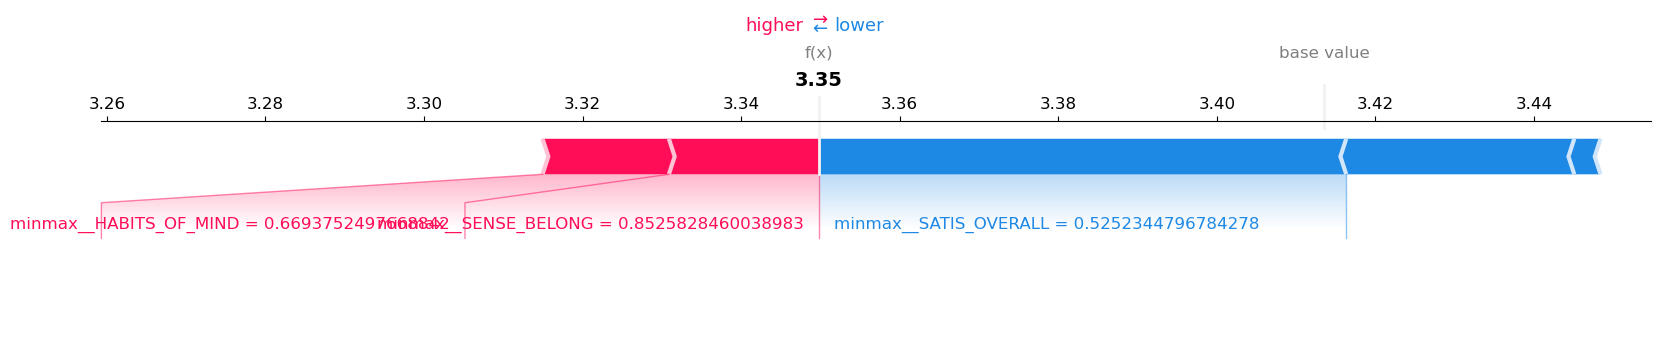

In [32]:
#index 0
gpa_function(0,"Force Plot at Index 0","fp0.png")

Force Plot at Index 10


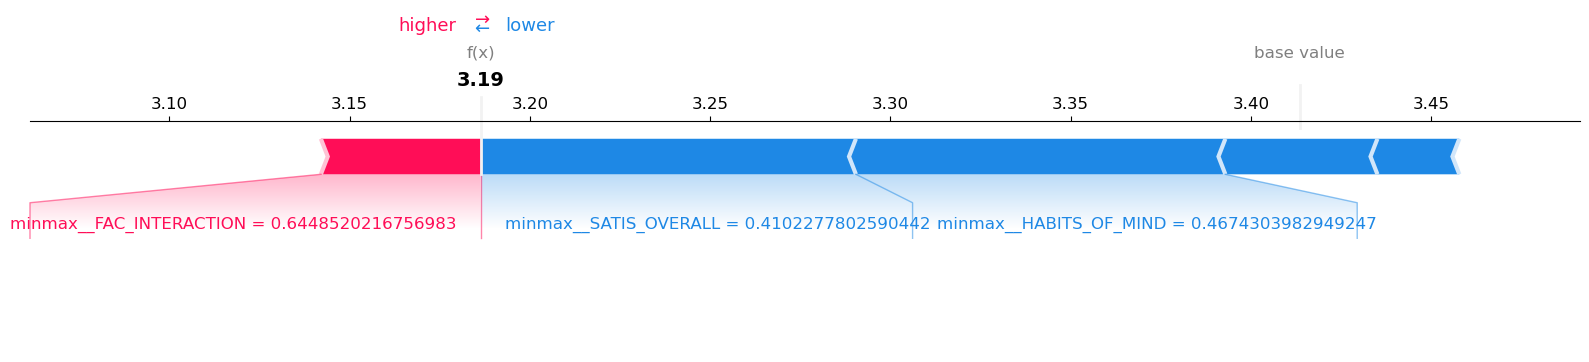

In [33]:
#index 10
gpa_function(10,"Force Plot at Index 10","fp10.png")

Force Plot at Index 100


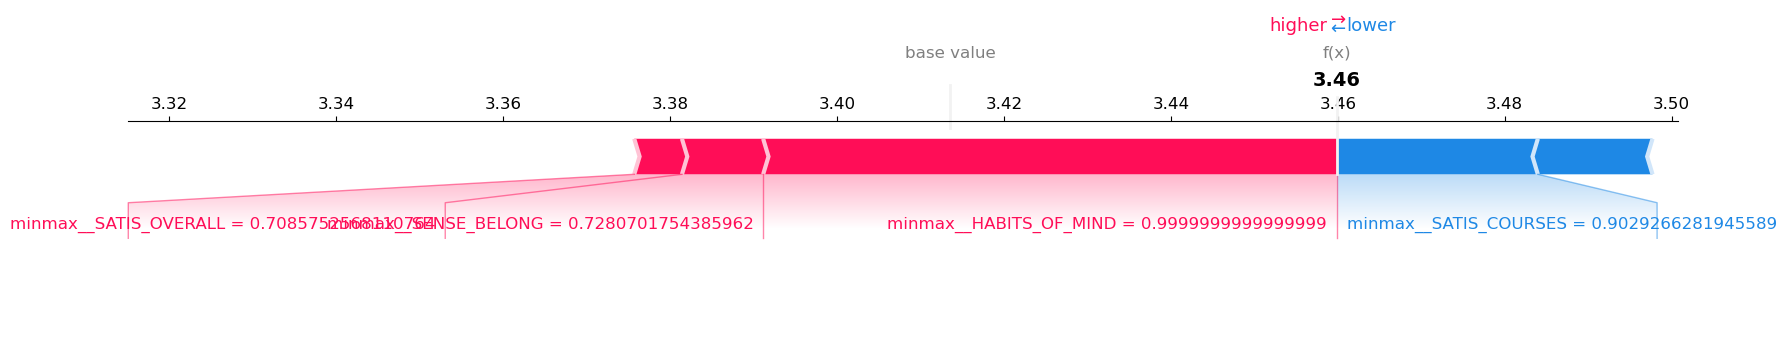

In [34]:
#index 100
gpa_function(100,"Force Plot at Index 100","fp100.png")